Matplotlib is building the font cache; this may take a moment.
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


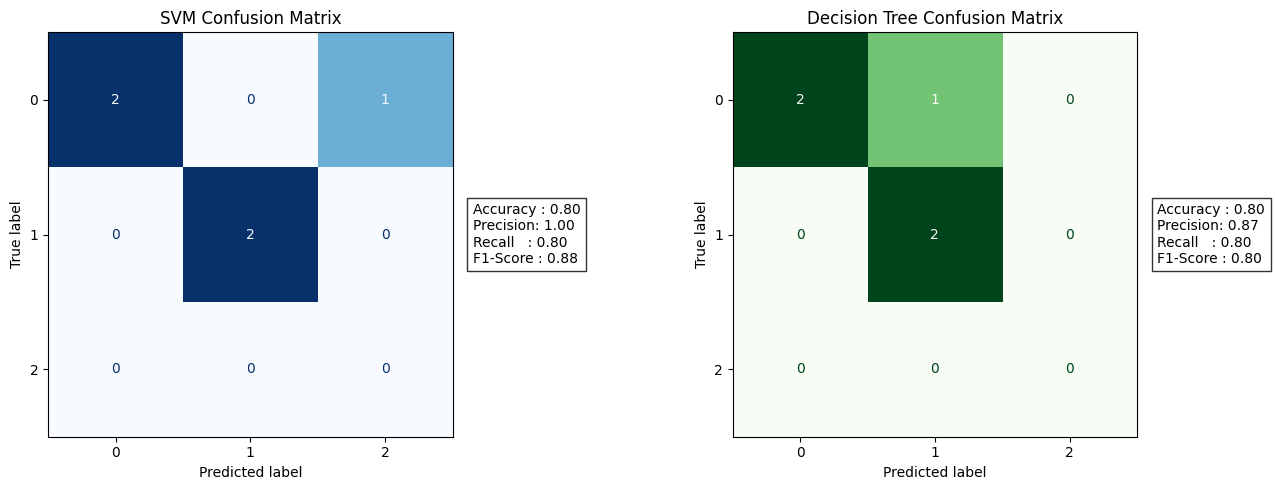

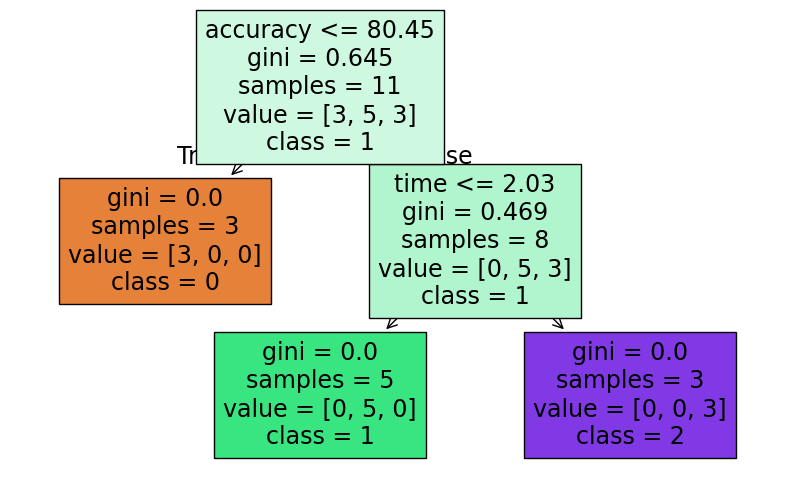

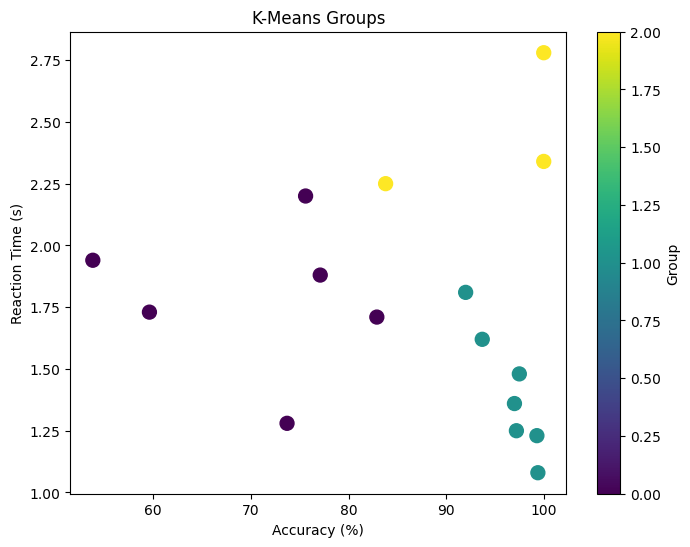

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

participants = {
    'id': list(range(1, 17)),

    'accuracy': [82.90, 99.30, 93.70, 83.80, 100.00, 73.70, 97.50, 99.40,
                 100.00, 77.10, 75.60, 92.00, 97.00, 97.20, 53.80, 59.60],
                 
    'time': [1.71, 1.23, 1.62, 2.25, 2.78, 1.28, 1.48, 1.08,
             2.34, 1.88, 2.20, 1.81, 1.36, 1.25, 1.94, 1.73]
}

table = pd.DataFrame(participants)

features = table[['accuracy', 'time']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
table['group'] = kmeans.fit_predict(features_scaled)

X = table[['accuracy', 'time']]
y = table['group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

def add_metrics_on_ax(ax, y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    metrics_text = (f"Accuracy : {acc:.2f}\n"
                    f"Precision: {prec:.2f}\n"
                    f"Recall   : {rec:.2f}\n"
                    f"F1-Score : {f1:.2f}")
    
    ax.text(1.05, 0.5, metrics_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='center', bbox=dict(facecolor='white', alpha=0.8))
    ax.set_title(f"{model_name} Confusion Matrix")

labels = sorted(y.unique())
fig, axes = plt.subplots(1, 2, figsize=(14,5))

svm_cm = confusion_matrix(y_test, svm_pred, labels=labels)
disp_svm = ConfusionMatrixDisplay(svm_cm, display_labels=[str(c) for c in labels])
disp_svm.plot(ax=axes[0], cmap='Blues', colorbar=False)
add_metrics_on_ax(axes[0], y_test, svm_pred, "SVM")

tree_cm = confusion_matrix(y_test, tree_pred, labels=labels)
disp_tree = ConfusionMatrixDisplay(tree_cm, display_labels=[str(c) for c in labels])
disp_tree.plot(ax=axes[1], cmap='Greens', colorbar=False)
add_metrics_on_ax(axes[1], y_test, tree_pred, "Decision Tree")

plt.tight_layout()

plt.show()

plt.figure(figsize=(10,6))
plot_tree(tree_model, feature_names=['accuracy', 'time'],
          class_names=[str(c) for c in labels],
          filled=True)

plt.show()

plt.figure(figsize=(8,6))
plt.scatter(table['accuracy'], table['time'], c=table['group'], cmap='viridis', s=100)
plt.xlabel('Accuracy (%)')
plt.ylabel('Reaction Time (s)')
plt.title('K-Means Groups')
plt.colorbar(label='Group')
plt.show()
